# Dataset: World Happiness Report<br/>
## Link: https://www.kaggle.com/datasets/unsdsn/world-happiness <br/>
## Chosen Feature: GDP per capita<br/>
## Chosen Target Variable: Score

## Importing the dataset and required libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model import LinearRegression

df = pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df.shape

(156, 9)

### Extracting the features and target variable

In [4]:
X_features = df.loc[:,'GDP per capita']
y = df.loc[:,'Score']

## Scatterplot with smoothed trend line

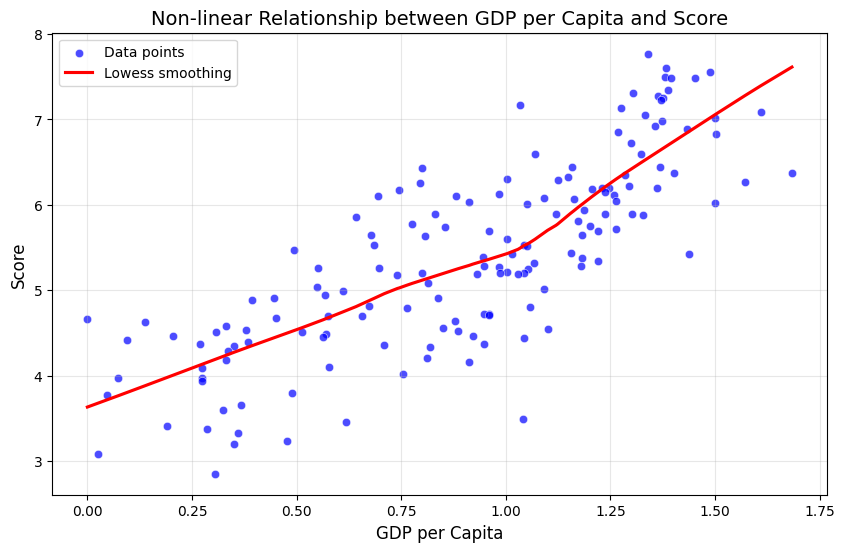

In [30]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['GDP per capita'], y=df['Score'], color='blue', alpha=0.7, label='Data points')

# Add a trend line using lowess (locally weighted scatterplot smoothing)
sns.regplot(x=df['GDP per capita'], y=df['Score'], lowess=True, scatter=False, color='red', label='Lowess smoothing')

# Customize the plot
plt.title("Non-linear Relationship between GDP per Capita and Score", fontsize=14)
plt.xlabel("GDP per Capita", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


#### Checking for null values

In [5]:
print(X_features.isnull().sum())
print(y.isnull().sum())

0
0


### Train-test split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X_features, y, test_size=0.20, random_state=42)
scaler = StandardScaler()
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
train_scaled = scaler.fit_transform(x_train)
test_scaled =scaler.transform(x_test)
print(train_scaled)
print(test_scaled)

[[ 0.5396316 ]
 [-1.49420169]
 [ 0.06065785]
 [-1.51105002]
 [-1.22944233]
 [-0.52662656]
 [ 0.21469966]
 [-0.23057746]
 [-0.20410152]
 [ 0.78272884]
 [-1.31368394]
 [ 1.12210221]
 [ 1.30502686]
 [ 0.41928644]
 [-1.3570082 ]
 [ 0.37596218]
 [ 0.33263792]
 [-0.28834313]
 [ 0.69126651]
 [-0.80342044]
 [ 1.22078524]
 [-0.02358377]
 [-1.24147685]
 [ 0.82364619]
 [ 1.20393692]
 [ 0.54925922]
 [-0.82989638]
 [-1.66509183]
 [ 0.78272884]
 [ 1.14857814]
 [-0.66622695]
 [ 1.14617124]
 [-1.07299361]
 [-1.69638157]
 [ 1.06915033]
 [-2.1561001 ]
 [ 0.15452707]
 [-0.48570921]
 [ 0.68645271]
 [ 1.89712507]
 [-0.36295714]
 [ 0.15452707]
 [ 0.63350083]
 [ 1.03063988]
 [-0.57476463]
 [ 0.74662529]
 [-0.4808954 ]
 [-2.04538255]
 [-1.29202181]
 [-1.4966086 ]
 [ 0.64072154]
 [-0.04043209]
 [ 0.73459077]
 [-0.96949677]
 [ 1.6275519 ]
 [-0.97912438]
 [-1.27517349]
 [-0.09819777]
 [-2.09352062]
 [-0.83471019]
 [ 0.9752811 ]
 [ 1.3387235 ]
 [-0.7745376 ]
 [-1.92985119]
 [ 0.03899572]
 [ 0.95843278]
 [ 0.41206

### Simple LinearRegression model for base metrics

In [7]:
linearreg = LinearRegression()
linearreg.fit(x_train, y_train)
y_pred = linearreg.predict(x_test)

### Calulating metrics on normal Linear Regression model

Mean Squared Error: 0.5079112698997723
R-squared: 0.5119632343226919


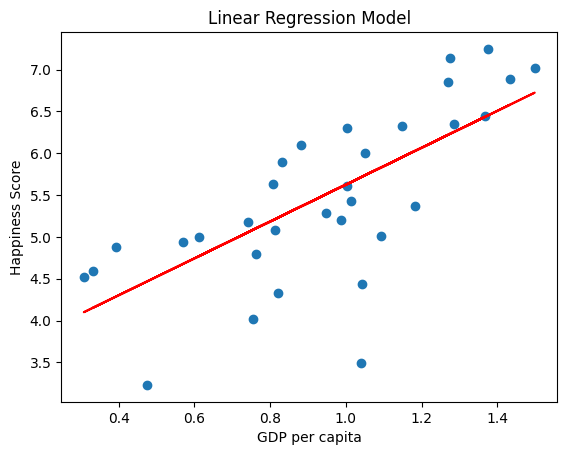

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the regression line
plt.plot(x_test, y_pred, color='red')
plt.scatter(x_test, y_test)
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.title("Linear Regression Model")
plt.show()

### Calulating metrics on normal Multilayer Regressor model

In [9]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
regressor.fit(x_train, y_train)

# Make predictions
y_pred = regressor.predict(x_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5095918136424207


## Tuning the required models with various parameters in GridSearchCV

In [10]:
from sklearn.svm import SVR

# Initialize Support Vector Regressor
svr = SVR()

# Define the parameter grid for SVR
svr_param_grid = {
    'C': [0.1, 1, 10],                   # Regularization parameter
    'gamma': [0.1, 0.01, 0.001],         # Kernel coefficient for the Gaussian kernel
    'kernel': ['rbf', 'linear', 'poly']  # Type of kernel to use
}


In [11]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize Bagging Regressor with a base estimator
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42)

# Define the parameter grid
bagging_param_grid = {
    'n_estimators': [10, 50, 100, 200],             # Number of base estimators
    'estimator__max_depth': [3, 5, 10, None],       # Depth of each tree
    'max_samples': [0.5, 0.7, 1.0],                 # Percentage of samples per base estimator
    'max_features': [0.5, 0.7, 1.0],                # Percentage of features per base estimator
    'bootstrap': [True, False]                      # Whether to bootstrap samples
}


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
gradient_boosting_param_grid = {
    'n_estimators': [100, 200, 300],                # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],        # Shrinks contribution of each tree
    'max_depth': [3, 5, 7, 10],                     # Depth of each tree
    'min_samples_split': [2, 5, 10],                # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],                  # Minimum samples to be a leaf node
    'subsample': [0.8, 1.0]                         # Fraction of samples used per tree
}


In [13]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize AdaBoost Regressor with Decision Tree as the base estimator
ada_boost = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1), random_state=42)

# Define the parameter grid
ada_boost_param_grid = {
    'n_estimators': [50, 100, 200, 300],            # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.5, 1.0],         # Weight applied at each boosting step
    'estimator__max_depth': [1, 3, 5, 7],           # Depth of the base estimator (decision tree)
}


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)

# Define the parameter grid
random_forest_param_grid = {
    'n_estimators': [100, 200, 300, 500],           # Number of trees in the forest
    'max_depth': [3, 5, 10, None],                  # Maximum depth of each tree
#    'min_samples_split': [2, 5, 10],               # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],                  # Minimum samples to be a leaf node
}


## Finding the best parameters for each model

In [15]:
from sklearn.model_selection import GridSearchCV

# Using GridSearchCV with Support Vector Regressor
grid_search_svr = GridSearchCV(estimator=svr, param_grid=svr_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svr.fit(x_train, y_train)

# Print the best parameters for the Support Vector Regressor
print("Best Parameters for SVR:", grid_search_svr.best_params_)
print("Best CV MSE for SVR:", -grid_search_svr.best_score_)



Best Parameters for SVR: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV MSE for SVR: 0.4622864094616522


In [16]:
# Using GridSearchCV with RandomForest
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=random_forest_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

print("Best Parameters for RandomForest:", grid_search_rf.best_params_)
print("Best CV MSE for RandomForest:", -grid_search_rf.best_score_)


Best Parameters for RandomForest: {'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 100}
Best CV MSE for RandomForest: 0.4267261765977586


In [17]:
# Using GridSearchCV with AdaBoost
grid_search_ada = GridSearchCV(estimator=ada_boost, param_grid=ada_boost_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ada.fit(x_train, y_train)

print("Best Parameters for AdaBoost:", grid_search_ada.best_params_)
print("Best CV MSE for AdaBoost:", -grid_search_ada.best_score_)

Best Parameters for AdaBoost: {'estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100}
Best CV MSE for AdaBoost: 0.4472439167361767


In [21]:
# Using GridSearchCV with GradientBoosting
grid_search_grad = GridSearchCV(estimator=gradient_boosting, param_grid=gradient_boosting_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_grad.fit(x_train, y_train)

print("Best Parameters for GradientBoosting:", grid_search_ada.best_params_)
print("Best CV MSE for GradientBoosting:", -grid_search_ada.best_score_)

Best Parameters for GradientBoosting: {'estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100}
Best CV MSE for GradientBoosting: 0.4472439167361767


In [23]:
# Using GridSearchCV with Bagging
grid_search_bag = GridSearchCV(estimator=bagging, param_grid=bagging_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_bag.fit(x_train, y_train)

print("Best Parameters for Bagging:", grid_search_ada.best_params_)
print("Best CV MSE for Bagging:", -grid_search_ada.best_score_)

Best Parameters for Bagging: {'estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100}
Best CV MSE for Bagging: 0.4472439167361767


## Saving predicted values with each model

In [24]:
svr_preds = grid_search_svr.predict(x_test)
rf_preds = grid_search_rf.predict(x_test)
grad_preds = grid_search_grad.predict(x_test)
ada_preds = grid_search_ada.predict(x_test)
bag_preds = grid_search_bag.predict(x_test)

## Plotting scatter plots for true vs predicted values 

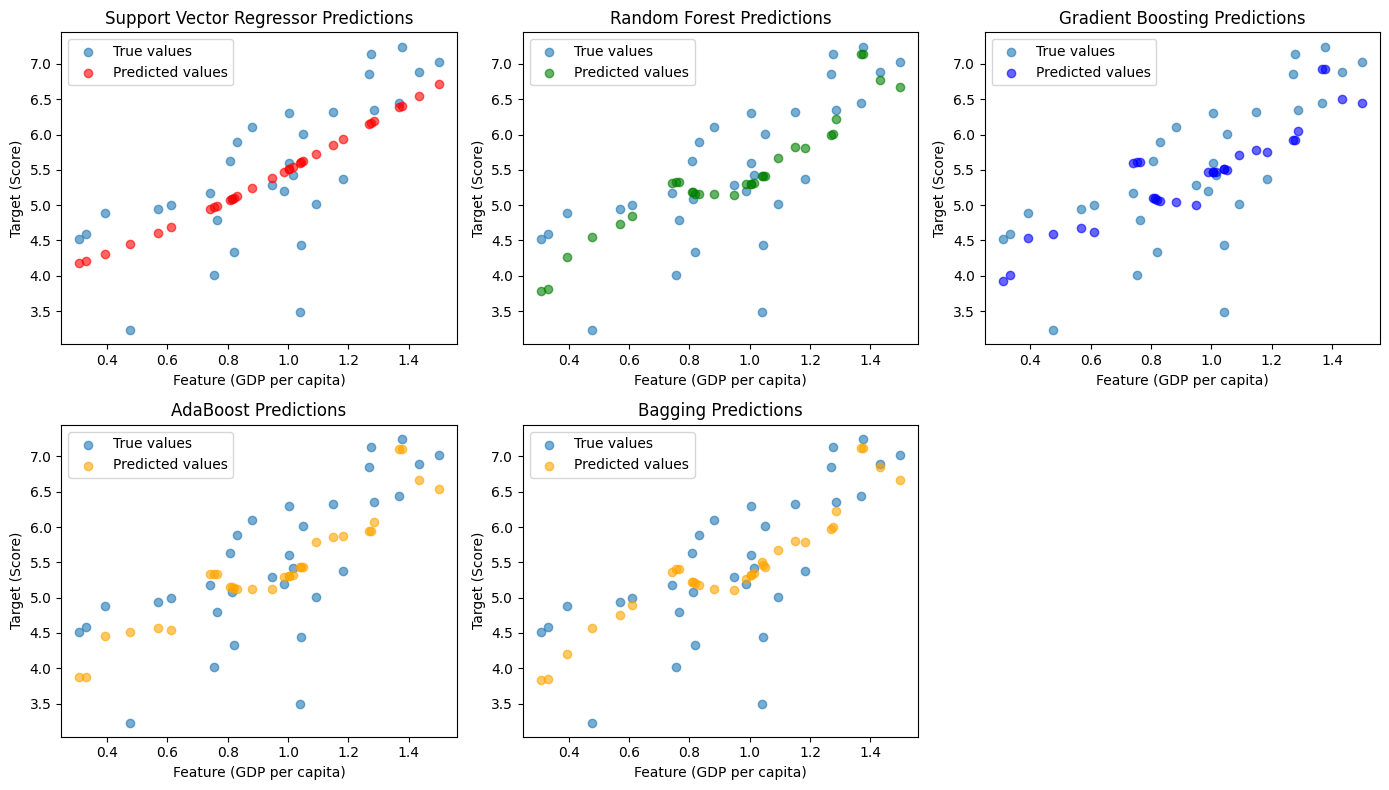

In [27]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.scatter(x_test, y_test, label="True values", alpha=0.6)
plt.scatter(x_test, svr_preds, label="Predicted values", color='r', alpha=0.6)
plt.title("Support Vector Regressor Predictions")
plt.xlabel("Feature (GDP per capita)")
plt.ylabel("Target (Score)")
plt.legend()

plt.subplot(2, 3, 2)
plt.scatter(x_test, y_test, label="True values", alpha=0.6)
plt.scatter(x_test, rf_preds, label="Predicted values", color='g', alpha=0.6)
plt.title("Random Forest Predictions")
plt.xlabel("Feature (GDP per capita)")
plt.ylabel("Target (Score)")
plt.legend()

plt.subplot(2, 3, 3)
plt.scatter(x_test, y_test, label="True values", alpha=0.6)
plt.scatter(x_test, grad_preds, label="Predicted values", color='b', alpha=0.6)
plt.title("Gradient Boosting Predictions")
plt.xlabel("Feature (GDP per capita)")
plt.ylabel("Target (Score)")
plt.legend()

plt.subplot(2, 3, 4)
plt.scatter(x_test, y_test, label="True values", alpha=0.6)
plt.scatter(x_test, ada_preds, label="Predicted values", color='orange', alpha=0.6)
plt.title("AdaBoost Predictions")
plt.xlabel("Feature (GDP per capita)")
plt.ylabel("Target (Score)")
plt.legend()

plt.subplot(2, 3, 5)
plt.scatter(x_test, y_test, label="True values", alpha=0.6)
plt.scatter(x_test, bag_preds, label="Predicted values", color='orange', alpha=0.6)
plt.title("Bagging Predictions")
plt.xlabel("Feature (GDP per capita)")
plt.ylabel("Target (Score)")
plt.legend()

plt.tight_layout()
plt.show()